<a href="https://colab.research.google.com/github/jsacco1/ml/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test the Keras TensorFlow API on the MNIST dataset.

Rationale: 
Computer vision has much potential for application in clinical imagining, especially with regards to digital pathology and radiology images. Here we will build a neural network to classify digit images of handwritten digits.


In [2]:
# import tensorflow and keras
import tensorflow as tf #upgrade to tf2.0
print(tf.__version__)

from tensorflow import keras

1.15.0


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# how to get data with TF2.0
# datasets, info = tfds.load(name='mnist', with_info=True, as_supervised=True)
# mnist_train, mnist_test = datasets['train'], datasets['test']

In [0]:
# load MNIST dataset from Keras
mnist = keras.datasets.mnist

In [5]:
# get training and test data
(image_rows, image_cols) = (28, 28)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


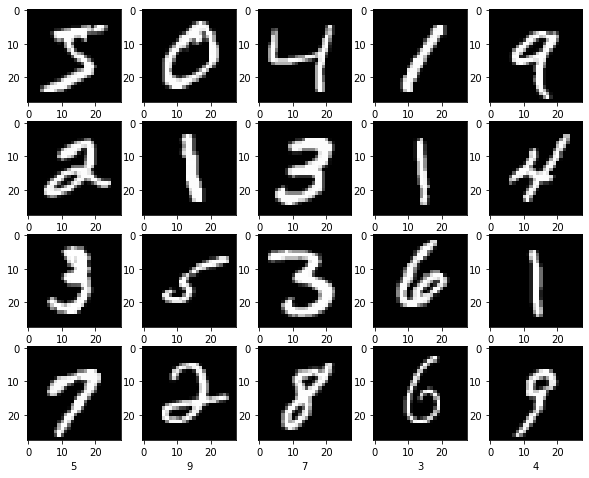

In [6]:
# plot some examples
plt.figure(figsize = (10,10))
for i in range(20):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i], cmap=plt.cm.gray)
  plt.xlabel(y_test[i])
plt.show()

In [7]:
# take a look at the dimensions of the training data
x_train.shape # 60000 images of 28x28 pixels

(60000, 28, 28)

# Reshape and Normalize the Images
4-D numpy arrays are needed to be able to use the dataset in Keras. However, as shown above, the array is currently only 3-D.

In addition, as this is a neural network, the input data must always be normalized. This is done by dividing the RBG codes by 255 (the maximum RGB code minus the minimum RGB code). 

The following code performs reshapes and normalizes the data:

In [8]:
# reshape the array to 4-dims so it can work in Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# ensure the values are of type float to get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


# Build the convolutional neural network (CNN)

We will build our model by using high level Keras API which uses either TensorFlow or Theano on the backend. (There are several high level TensorFlow APIs such as Layers, Keras, and Estimators which helps us create neural networks with high level knowledge.) However, this may lead to confusion since they all differ in their implementation structure. Therefore, if you see completely different codes for the same neural network although they all use tensorflow, this is why. 

I will use the most straightforward API which is Keras. Now, import the Sequential Model from Keras and add Conv2D, MaxPooling, Flatten, Dropout, and Dense layers. Conv2D, maxpooling, and dense layers comprise CNNs. In addition, dropout layers prevent overfitting by disregarding some of the neurons while training. Flatten layers flatten 2D arrays to 1D arrays before building the fully connected layers.

In [9]:
# import the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# make a sequential model. add the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Using TensorFlow backend.


We may experiment with any number for the first Dense layer; however, the final Dense layer must have 10 neurons since we have 10 number classes (0, 1, 2, …, 9). You may always experiment with kernel size, pool size, activation functions, dropout rate, and number of neurons in the first Dense layer to get a better result.

# Compile and Fit the Model
With the above code, we created an non-optimized empty CNN. Now set an optimizer with a given loss function which uses a metric. Then, we can fit the model on the training data. Here, we use the Adam optimization algorithm, which is popular for computer vision and natural language processing tasks. (read more about it here: https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)

Use the following code for these tasks:

In [10]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





60000/60000 [==============================] - 39s 648us/step - loss: 0.2082 - acc: 0.9374
Epoch 2/10
60000/60000 [==============================] - 37s 617us/step - loss: 0.0835 - acc: 0.9747
Epoch 3/10
60000/60000 [==============================] - 38s 631us/step - loss: 0.0595 - acc: 0.9815
Epoch 4/10
60000/60000 [==============================] - 38s 634us/step - loss: 0.0456 - acc: 0.9854
Epoch 5/10
60000/60000 [==============================] - 38s 639us/step - loss: 0.0357 - acc: 0.9883
Epoch 6/10
60000/60000 [==============================] - 38s 633us/step - loss: 0.0290 - acc: 0.9904
Epoch 7/10
60000/60000 [==============================] - 38s 638us/step - loss: 0.0247 - acc: 0.9919
Epoch 8/10
60000/60000 [==============================] - 38s 638us/step - loss: 0.0219 - acc: 0.9924
Epoch 9/10
60000/60000 [==============================] - 38s 638us/step - loss:

Evaluate the Model
Finally, evaluate the trained model with x_test and y_test:

In [11]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 193us/step


[0.06329724881081893, 0.984]

We achieved 98.4% accuracy with a basic model. However, in many image classification cases (e.g., programming autonomous vehicles), we cannot tolerate even 0.1% error since, to oversimpplify, that might cause 1 accident in 1000 cases. However, for our first model, the result is still pretty good. 

Make individual predictions with the following code:

6


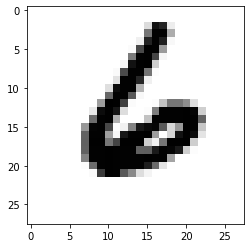

In [15]:
image_index = 8888
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, image_rows, image_cols, 1))
print(pred.argmax())

# Congratulations! 
You have implemented a CNN on the MNIST dataset that classifies with near-100% accurately.